# Data Preprocessing (Over-sampling)

In [1]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Loading in our selected top varieties data 

In [2]:
df2 = pd.read_csv('../input/wine-reviews/winemag-data-130k-v2.csv')
top_varieties_count = pd.read_csv('../input/wine-review-data-top-varieties/top_varieties_count.csv')
top_40_varieties = pd.read_csv('../input/wine-review-data-top-varieties/top_40_varieties.csv')
top_40_varieties.head(2)

country                                        description   designation  \
0     Italy  Aromas include tropical fruit, broom, brimston...  Vulkà Bianco   
1  Portugal  This is ripe and fruity, a wine that is smooth...      Avidagos   

   points  price           province region_1 region_2    taster_name  \
0      87    NaN  Sicily & Sardinia     Etna      NaN  Kerin O’Keefe   
1      87   15.0              Douro      NaN      NaN     Roger Voss   

  taster_twitter_handle                                          title  \
0          @kerinokeefe              Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger  Quinta dos Avidagos 2011 Avidagos Red (Douro)   

          variety               winery  \
0     White Blend              Nicosia   
1  Portuguese Red  Quinta dos Avidagos   

                                         not_vintage  vintage  
0  Italy Vulkà Bianco Sicily & Sardinia Etna Nicosia   2013.0  
1        Portugal Avidagos Douro Quinta dos Avidagos   2011.0

In [3]:
# renaming the columns in top_varieties_count
top_varieties_count = top_varieties_count.rename(columns={'variety': 'count', 'Unnamed: 0': 'variety'})
top_varieties_count = top_varieties_count.set_index('variety') # setting the index
top_varieties_count = top_varieties_count['count'] # making it a Series
top_varieties_count

variety
Pinot Noir                       13272
Chardonnay                       11753
Cabernet Sauvignon                9472
Red Blend                         8946
Bordeaux-style Red Blend          6915
Riesling                          5189
Sauvignon Blanc                   4967
Syrah                             4142
Rosé                              3564
Merlot                            3102
Nebbiolo                          2804
Zinfandel                         2714
Sangiovese                        2707
Malbec                            2652
Portuguese Red                    2466
White Blend                       2360
Sparkling Blend                   2153
Tempranillo                       1810
Rhône-style Red Blend             1471
Pinot Gris                        1455
Champagne Blend                   1396
Cabernet Franc                    1353
Grüner Veltliner                  1345
Portuguese White                  1159
Bordeaux-style White Blend        1066
Pinot Grigio     

## We will be selecting the top 20 varireties as our working varieties

In [4]:
top = 20 # selecting top n varities as our working varieties. note 1 < n <= 40

# making a datframe of our selecting top n varieties
top_df = top_40_varieties[top_40_varieties['variety'].isin(top_varieties_count.iloc[:top].index)]
print('percentage of initial 130k dataframe is {}%'.format(round(100*top_df.shape[0] / df2.shape[0]), 3))
print(len(top_df['variety'].unique()))
top_df.head(2)

percentage of initial 130k dataframe is 72%
20


country                                        description   designation  \
0     Italy  Aromas include tropical fruit, broom, brimston...  Vulkà Bianco   
1  Portugal  This is ripe and fruity, a wine that is smooth...      Avidagos   

   points  price           province region_1 region_2    taster_name  \
0      87    NaN  Sicily & Sardinia     Etna      NaN  Kerin O’Keefe   
1      87   15.0              Douro      NaN      NaN     Roger Voss   

  taster_twitter_handle                                          title  \
0          @kerinokeefe              Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger  Quinta dos Avidagos 2011 Avidagos Red (Douro)   

          variety               winery  \
0     White Blend              Nicosia   
1  Portuguese Red  Quinta dos Avidagos   

                                         not_vintage  vintage  
0  Italy Vulkà Bianco Sicily & Sardinia Etna Nicosia   2013.0  
1        Portugal Avidagos Douro Quinta dos Avidagos   2011.0

In [5]:
# threshold of miniority variety to over sample (use sentences as document instead of the whole description)
minority_threshold = 5000 

# making a dataframe of the miniority classes
minority_df = top_df[top_df['variety'].isin(top_varieties_count[top_varieties_count < \
                                                                      minority_threshold].index)]
print(minority_df.shape)
print(len(minority_df['variety'].unique()))
minority_df.head(2)

(38367, 15)
14


country                                        description   designation  \
0     Italy  Aromas include tropical fruit, broom, brimston...  Vulkà Bianco   
1  Portugal  This is ripe and fruity, a wine that is smooth...      Avidagos   

   points  price           province region_1 region_2    taster_name  \
0      87    NaN  Sicily & Sardinia     Etna      NaN  Kerin O’Keefe   
1      87   15.0              Douro      NaN      NaN     Roger Voss   

  taster_twitter_handle                                          title  \
0          @kerinokeefe              Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger  Quinta dos Avidagos 2011 Avidagos Red (Douro)   

          variety               winery  \
0     White Blend              Nicosia   
1  Portuguese Red  Quinta dos Avidagos   

                                         not_vintage  vintage  
0  Italy Vulkà Bianco Sicily & Sardinia Etna Nicosia   2013.0  
1        Portugal Avidagos Douro Quinta dos Avidagos   2011.0

### nltk and spacy are the two most popular libraries in NLP. We will just use nltk to tokenize sentences in our miniority class but for our heavy weight preprocessing, we will use spacy because it is mostly used in industries and has wealth of functionalities.

In [6]:
from nltk.tokenize import sent_tokenize # importing useful library

In [7]:
oversampled_miniority_lst = [] # empty list to store sentences as tokens miniority corpus

# creating a function to use sentences as tokens for the miniority classes
def over_sample_miniority(row):
    doc_list = sent_tokenize(row['description'])
    for sent in doc_list:
        row['description'] = sent
        oversampled_miniority_lst.append(list(row))

In [8]:
minority_df.apply(over_sample_miniority, axis=1); # over sample the miniority classes

In [9]:
# converts oversampled_miniority_lst to a dataframe
oversampled_miniority_df = pd.DataFrame(oversampled_miniority_lst, columns=minority_df.columns)
print(oversampled_miniority_df.shape)
oversampled_miniority_df.head(2)

(104101, 15)


country                                        description   designation  \
0   Italy  Aromas include tropical fruit, broom, brimston...  Vulkà Bianco   
1   Italy  The palate isn't overly expressive, offering u...  Vulkà Bianco   

   points  price           province region_1 region_2    taster_name  \
0      87    NaN  Sicily & Sardinia     Etna      NaN  Kerin O’Keefe   
1      87    NaN  Sicily & Sardinia     Etna      NaN  Kerin O’Keefe   

  taster_twitter_handle                              title      variety  \
0          @kerinokeefe  Nicosia 2013 Vulkà Bianco  (Etna)  White Blend   
1          @kerinokeefe  Nicosia 2013 Vulkà Bianco  (Etna)  White Blend   

    winery                                        not_vintage  vintage  
0  Nicosia  Italy Vulkà Bianco Sicily & Sardinia Etna Nicosia   2013.0  
1  Nicosia  Italy Vulkà Bianco Sicily & Sardinia Etna Nicosia   2013.0

In [10]:
# a view at the new descriptions of the oversampled miniority classes
oversampled_miniority_df['description'][:5].values

array(['Aromas include tropical fruit, broom, brimstone and dried herb.',
       "The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",
       'This is ripe and fruity, a wine that is smooth while still structured.',
       'Firm tannins are filled out with juicy red berry fruits and freshened with acidity.',
       "It's  already drinkable, although it will certainly be better from 2016."],
      dtype=object)

### we see that sentences are counted as tokens instead of the whole review

In [11]:
# selecting majority classes as a dataframe to concatenate to oversampled_miniority_lst
majority_df = top_df[top_df['variety'].isin(\
                                        top_varieties_count[top_varieties_count >= minority_threshold].index)]

# concatenates majority_df to oversampled_miniority_lst
balanced_df = pd.concat([majority_df, oversampled_miniority_df]) 
balanced_df = balanced_df.reset_index().drop('index', axis=1) # resets index
print(balanced_df.shape)
balanced_df.head(2)

(159648, 15)


country                                        description  \
0      US  Pineapple rind, lemon pith and orange blossom ...   
1      US  Much like the regular bottling from 2012, this...   

                          designation  points  price  province  \
0                Reserve Late Harvest      87   13.0  Michigan   
1  Vintner's Reserve Wild Child Block      87   65.0    Oregon   

              region_1           region_2         taster_name  \
0  Lake Michigan Shore                NaN  Alexander Peartree   
1    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
1           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

      variety        winery  \
0    Riesling    St. Julian   
1  Pinot Noir  Sweet Cheeks   

                                         not_vintage  vintage  
0  US Reserve Late Harvest Michigan Lake Michigan...   2013.0  
1  US Vintner's Reserve Wild Child Block Oregon W...   2012.0

In [12]:
balanced_variety = balanced_df['variety'].value_counts() # gets a Series of the variety count in balanced_df
balanced_variety

Pinot Noir                  13272
Sauvignon Blanc             12801
Chardonnay                  11753
Syrah                       11128
Cabernet Sauvignon           9472
Rosé                         9207
Red Blend                    8946
Nebbiolo                     8107
Malbec                       8047
Merlot                       7874
Portuguese Red               7734
Sangiovese                   7432
Bordeaux-style Red Blend     6915
Zinfandel                    6512
White Blend                  6034
Sparkling Blend              5740
Tempranillo                  5552
Riesling                     5189
Rhône-style Red Blend        3972
Pinot Gris                   3961
Name: variety, dtype: int64

In [13]:
print('before sentence oversampling, highest class ratio was {}'.format(\
                                        top_varieties_count.iloc[0] / top_varieties_count.iloc[top]))

before sentence oversampling, highest class ratio was 9.507163323782235


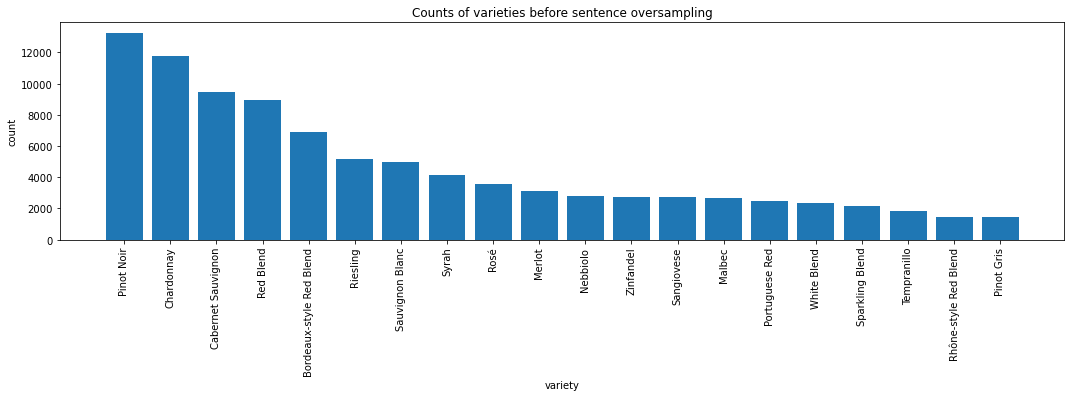

In [14]:
fig = plt.figure(figsize=(18, 4))
plt.bar(top_varieties_count[:top].index, top_varieties_count[:top].values)
plt.xticks(rotation=90)
plt.xlabel('variety')
plt.ylabel('count')
plt.title('Counts of varieties before sentence oversampling')
plt.show()

In [15]:
print('after sentence oversampling, highest class ratio is {}'.format(\
                                                    balanced_variety.iloc[0] / balanced_variety.iloc[-1]))

after sentence oversampling, highest class ratio is 3.3506690229739964


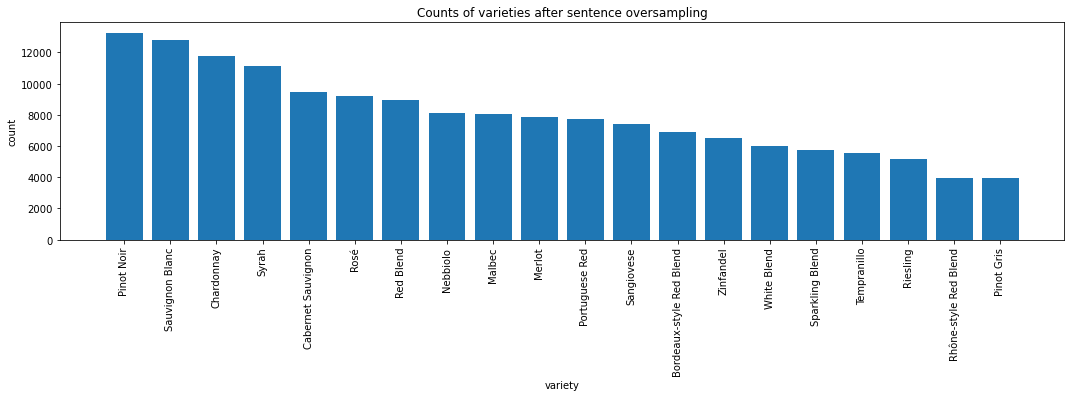

In [16]:
fig = plt.figure(figsize=(18, 4))
plt.bar(balanced_variety.index, balanced_variety.values)
plt.xticks(rotation=90)
plt.xlabel('variety')
plt.ylabel('count')
plt.title('Counts of varieties after sentence oversampling')
plt.show()

## Let's find if any variety is unique to a particular country

In [17]:
by_variety = top_df.groupby('variety') # groupby variety

In [18]:
by_variety_dict = {variety: df for variety, df in by_variety} # make a dict of the groups

In [19]:
print(list(by_variety_dict.keys())) # prints the varieties

['Bordeaux-style Red Blend', 'Cabernet Sauvignon', 'Chardonnay', 'Malbec', 'Merlot', 'Nebbiolo', 'Pinot Gris', 'Pinot Noir', 'Portuguese Red', 'Red Blend', 'Rhône-style Red Blend', 'Riesling', 'Rosé', 'Sangiovese', 'Sauvignon Blanc', 'Sparkling Blend', 'Syrah', 'Tempranillo', 'White Blend', 'Zinfandel']


In [20]:
def unique_variety_to_country(dict_):
    res = []
    for variety in dict_:
        if dict_[variety]['country'].value_counts().shape[0] == 1:
            res.append(variety)
    return res

In [21]:
res = unique_variety_to_country(by_variety_dict)
res

['Portuguese Red']

### We see that 'Portuguese Red' is a variety that is unique to a particular country. Let's check out the country.

In [22]:
by_variety_dict[res[0]].head(3)

country                                        description  \
1    Portugal  This is ripe and fruity, a wine that is smooth...   
128  Portugal  From an estate in the south of the Alentejo, t...   
169  Portugal  A year in wood and 30 months in bottle before ...   

                  designation  points  price    province region_1 region_2  \
1                    Avidagos      87   15.0       Douro      NaN      NaN   
128      Grande Reserva Tinto      91   26.0  Alentejano      NaN      NaN   
169  Montes Claros Garrafeira      90   28.0    Alentejo      NaN      NaN   

    taster_name taster_twitter_handle  \
1    Roger Voss            @vossroger   
128  Roger Voss            @vossroger   
169  Roger Voss            @vossroger   

                                                 title         variety  \
1        Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
128  Casa Santa Vitória 2013 Grande Reserva Tinto R...  Portuguese Red   
169  Adega Cooperativa de Borba 2012 Montes Claros ...  Portuguese Red   

                         winery  \
1           Quinta dos Avidagos   
128          Casa Santa Vitória   
169  Adega Cooperativa de Borba   

                                           not_vintage  vintage  
1          Portugal Avidagos Douro Quinta dos Avidagos   2011.0  
128  Portugal Grande Reserva Tinto Alentejano Casa ...   2013.0  
169  Portugal Montes Claros Garrafeira Alentejo Ade...   2012.0

*****And of course, Portugal is the country*****

In [23]:
# importing useful libraries
import spacy
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer, TfidfTransformer, TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Let's check for Nan values

In [24]:
nan_df = top_df.isnull().sum().to_frame()
nan_df.rename(columns={0: 'n_Nan'}, inplace=True)
nan_df['%missing'] = 100*nan_df['n_Nan'] / top_df.shape[0]
nan_df

n_Nan   %missing
country                   37   0.039398
description                0   0.000000
designation            26985  28.733735
points                     0   0.000000
price                   5691   6.059799
province                  37   0.039398
region_1               13466  14.338650
region_2               50804  54.096301
taster_name            18863  20.085397
taster_twitter_handle  22626  24.092255
title                      0   0.000000
variety                    0   0.000000
winery                     0   0.000000
not_vintage                0   0.000000
vintage                 2202   2.344698

In [25]:
# creating a spacy pipeline and disabling tagger, parser and ner to speed up tokenizer
nlp = spacy.load('en', disable=['tagger', 'parser', 'ner']) 

### We will be evaluating six preprocessing approaches (methods) to choose the best one.

1. sentence oversampling without including 'not_vintage'
2. no oversampling without including 'not_vintage'
3. SMOTE oversampling without including 'not_vintage'
4. sentence oversampling including 'not_vintage'
5. no oversampling including 'not_vintage'
6. SMOTE oversampling without including 'not_vintage'

- Remeber, ````not_vintage```` is the combination of non-numeric categorical features of ````country, province, region1, region2, winery, and designation````

In [26]:
# getting corpus of sentence oversampling
sent_oversample_corpus = [doc for doc in balanced_df['description']]
sent_oversample_le = LabelEncoder() # initializes a LabelEncoder object
# encodes the labels
sent_oversample_labels = sent_oversample_le.fit_transform([label for label in balanced_df['variety']])

# getting corpus of no oversampling
no_oversample_corpus = [doc for doc in top_df['description']]
no_oversample_le = LabelEncoder() # initializes a LabelEncoder object
# encodes the labels
no_oversample_label = no_oversample_le.fit_transform([label for label in top_df['variety']])

### Let's have a view of ````sent_oversample_corpus```` and ````no_oversample_corpus````

In [27]:
sent_oversample_corpus[-3:]

['It also has weight and a solid, powerful core of spice and baked apple flavors.',
 'With its structure still developing, the wine needs to age.',
 'Drink from 2015.']

In [28]:
no_oversample_corpus[-3:]

["Notes of honeysuckle and cantaloupe sweeten this deliciously feather-light spätlese. It's intensely juicy, quenching the palate with streams of tart tangerine and grapefruit acidity, yet wraps up with a kiss of honey and peach.",
 'Citation is given as much as a decade of bottle age prior to release, which means it is pre-cellared and drinking at its peak. Baked cherry, cocoa and coconut flavors combine gracefully, with soft, secondary fruit compote highlights.',
 'A dry style of Pinot Gris, this is crisp with some acidity. It also has weight and a solid, powerful core of spice and baked apple flavors. With its structure still developing, the wine needs to age. Drink from 2015.']

In [29]:
# creating a dictionary to decode the encoded labels (we could also use the inverse_transform method of the 
# LabelEncoder object)
sent_oversample_map = {v: k for k, v in enumerate(sent_oversample_le.classes_)}
no_oversample_map = {v: k for k, v in enumerate(no_oversample_le.classes_)}

In [30]:
stop_words = spacy.lang.en.STOP_WORDS # getting spacy's stop-words
print("is 'become' in stop_words? ", "become" in stop_words)
print("is 'became' in stop_words? ", "became" in stop_words)

is 'become' in stop_words?  True
is 'became' in stop_words?  True


### from the above, if we are lemmatizing our corpus (which we would do), we need to lemmatize the stop-words also. First let's see a sample of how our tokenizer would clean up a messy document. We want to remove digits, alpha-numeric, special characters, and punctuations. We also want to lemmatize words and use a common case. We will choose to work with lower case so words like 'Please' and 'please' wouldn't be counted as seperate words.

In [31]:
sample_text = "Please! é don't Do isn't? runs honey-well ran: lo50 it did, 0.5 doiNg he 100 #fr @h... +234 me3."
lst = []
for p in nlp(sample_text):
    if p.is_alpha:
        lst.append(p.lemma_.lower())
print(lst)

['please', 'é', 'do', 'do', 'be', 'run', 'honey', 'good', 'run', 'it', 'do', 'doing', 'he', 'fr']


### we will encapsulate the above code in a list comprehension, and that will be our tokenizer function.

In [32]:
def tokenizer(text):
    return [word.lemma_.lower() for word in nlp(text) if word.is_alpha]

### After tokenizer, there is a weird word '-pron-' that appears probably because spacy lemmatizes some pronouns as '-pron-'. Some numbers strangely still appeared after tokenizing (and double tokenizing)...it may be due to a bug in spacy. We wil include these to our stop-words. We will also lemmatize our stop words since we are lemmatizing our tokens. The word 'wine' as expected have a high count in our data, so we will include it to stop words too.

In [33]:
stop_words_lemma = {word.lemma_.lower() for word in nlp(' '.join(stop_words))} | {'-pron-', 'wine', '10', '12', \
                        'aah', 'aa', 'ab', 'aaa', 'aand', '16', '2', '20', '30', '4', '40', '5', '6', '7', '8', '9'}

print("is 'become' in stop_words after lemmatizing stop words? ", "become" in stop_words_lemma)
print("is 'became' in stop_words after lemmatizing stop words? ", "became" in stop_words_lemma) 
print("is '-pron-' in stop_words? ", "-pron-" in stop_words_lemma)
print("is 'wine' in stop_words? ", "wine" in stop_words_lemma)

is 'become' in stop_words after lemmatizing stop words?  True
is 'became' in stop_words after lemmatizing stop words?  False
is '-pron-' in stop_words?  True
is 'wine' in stop_words?  True


In [34]:
# creating a RepeatedStratifiedKFold object. Since we plan using 25% as our test-size, we will use 4 fold cv.
# to have a level plain ground for comparing different models, we will be using random state of 1 through out.
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)

## Methods 1 - 3 ( ````Description```` only)

### Method 1

In [35]:
# initializes a TfidfVectorizer object
sent_tfidf_vec = TfidfVectorizer(stop_words=stop_words_lemma, tokenizer=tokenizer)

# fit and transform the corpus
sent_x = sent_tfidf_vec.fit_transform(sent_oversample_corpus)

In [36]:
# initializing a baseline classifier object
sent_oversample_model = DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=1)

# getting cross validation scores
sent_scores = cross_val_score(sent_oversample_model, sent_x, sent_oversample_labels, \
                         scoring='f1_weighted', cv=cv, n_jobs=4, verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   33.6s finished


In [37]:
np.mean(sent_scores) # mean of the scores

0.2840761827166403

## Method 2

In [38]:
# initializes a TfidfVectorizer object
no_over_tfidf_vec = TfidfVectorizer(stop_words=stop_words_lemma, tokenizer=tokenizer)

# fits and transforms the corpus
no_over_x = no_over_tfidf_vec.fit_transform(no_oversample_corpus)

In [39]:
# initializing a baseline classifier object
no_oversample_model = DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=1)

# getting the cross validation scores
no_over_scores = cross_val_score(no_oversample_model, no_over_x, no_oversample_label, \
                         scoring='f1_weighted', cv=cv, n_jobs=4, verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   25.4s finished


In [40]:
np.mean(no_over_scores)

0.29027328442049144

## Method 3

In [41]:
# initializes a TfidfVectorizer object
smote_tfidf_vec = TfidfVectorizer(stop_words=stop_words_lemma, tokenizer=tokenizer)

# fits and transforms the corpus
smote_x = smote_tfidf_vec.fit_transform(no_oversample_corpus)

### When using SMOTE for train and testing, it is important that we apply SMOTE to only the training set and not the pre-splitted data so that our test set will not have a copy of an observation in the training set else, our model will give false metric results. Since we are doing cross validation, we will use Imblearn pipeline instead of sklearn's pipeline. With Imblearn's pipeline, we are sure that SMOTE will be apply only after splitting for a particular cross validation. 

In [42]:
smote = SMOTE(random_state=1, n_jobs=4) # initializes a SMOTE object

# initializes a classifier object
smote_oversample_model = DecisionTreeClassifier(max_depth=10, random_state=1)

# creates a smote pipeline
smote_pipe = Pipeline([('smote', smote), ('model', smote_oversample_model)], verbose=True)

# getting the cross validation scores
smote_scores = cross_val_score(smote_pipe, smote_x, no_oversample_label, \
                         scoring='f1_weighted', cv=cv, n_jobs=4, verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  2.9min finished


In [43]:
np.mean(smote_scores)

0.3322810767141489

## Methods 4 - 6 (````description```` plus ````not_vintage````)

### First, let's make a corpus where each document is ````description```` plus ````not_vintage````

In [44]:
# for sentence oversampling
sent_oversample_corpus2 = [doc1 + ' ' + doc2 for doc1, doc2 in zip(\
                                                        balanced_df['description'], balanced_df['not_vintage'])]

# for no oversampling
no_oversample_corpus2 = [doc1 + ' ' + doc2 for doc1, doc2 in zip(\
                                                        top_df['description'], top_df['not_vintage'])]

### let's see how the combination of ````description```` and ````not_vintage```` looks like

In [45]:
sent_oversample_corpus2[-3:]

['It also has weight and a solid, powerful core of spice and baked apple flavors. France Alsace Alsace Domaine Marcel Deiss',
 'With its structure still developing, the wine needs to age. France Alsace Alsace Domaine Marcel Deiss',
 'Drink from 2015. France Alsace Alsace Domaine Marcel Deiss']

In [46]:
no_oversample_corpus2[:3] 

["Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity. Italy Vulkà Bianco Sicily & Sardinia Etna Nicosia",
 "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016. Portugal Avidagos Douro Quinta dos Avidagos",
 'Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented. US Oregon Willamette Valley Willamette Valley Rainstorm']

## Method 4

In [47]:
# initializes a Tfidfvectorizer object
sent_tfidf_vec2 = TfidfVectorizer(stop_words=stop_words_lemma, tokenizer=tokenizer)

# fits and transform the corpus
sent_x2 = sent_tfidf_vec2.fit_transform(sent_oversample_corpus2)

In [48]:
# initializes a classifier object
sent_oversample_model2 = DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=1)

# getting the cross validation scores
sent_scores2 = cross_val_score(sent_oversample_model2, sent_x2, sent_oversample_labels, \
                         scoring='f1_weighted', cv=cv, n_jobs=4, verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   39.3s finished


In [49]:
np.mean(sent_scores2)

0.33331975276360404

### Method 5

In [50]:
# initializes a tfidfvectorizer object
no_over_tfidf_vec2 = TfidfVectorizer(stop_words=stop_words_lemma, tokenizer=tokenizer)

# fits and transforms the corpus
no_over_x2 = no_over_tfidf_vec2.fit_transform(no_oversample_corpus2)

In [51]:
# initializes a classifier object
no_oversample_model2 = DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=1)

# getting cross validation scores
no_over_scores2 = cross_val_score(no_oversample_model2, no_over_x2, no_oversample_label, \
                         scoring='f1_weighted', cv=cv, n_jobs=4, verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   33.3s finished


In [52]:
np.mean(no_over_scores2)

0.291548912125046

## Method 6

In [53]:
# initializes a tfidfvectorixer object
smote_tfidf_vec2 = TfidfVectorizer(stop_words=stop_words_lemma, tokenizer=tokenizer)

# fits and transforms the corpus
smote_x2 = smote_tfidf_vec2.fit_transform(no_oversample_corpus2)

In [54]:
# initializes a SMOTE object
smote2 = SMOTE(random_state=1, n_jobs=4)

# initializes a classifier
smote_oversample_model2 = DecisionTreeClassifier(max_depth=10, random_state=1)

# creating a pipeline
smote_pipe2 = Pipeline([('smote', smote2), ('model', smote_oversample_model2)], verbose=True)

# getting the scores
smote_scores2 = cross_val_score(smote_pipe2, smote_x2, no_oversample_label, \
                         scoring='f1_weighted', cv=cv, n_jobs=4, verbose=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  3.3min finished


In [55]:
np.mean(smote_scores2)

0.2872408779340944

# sent_oversampling of the combination of ````description```` and ````not_vintage```` (method 4) seems to be the best approach. Our next task is to build and tune more sophisticated models using method 4 and method 3 each (since their scores are close). We will also try other embeddings like word2vec etc. 

## Let's see some of the words of the top 20 and lowest 20 idf scores from the best approach (method 4)

In [56]:
# let's see just the first 20 alphabetically sorted words in our vocabulary with their corresponding idf scores
ind_to_word = sent_tfidf_vec2.get_feature_names()

for ind in range(20):
    print(sent_tfidf_vec2.idf_[ind], ind_to_word[ind])

9.889690481063147 aarde
10.147519590365247 aaron
11.03482278536615 aatto
8.253345115709124 abacela
10.901291392741628 abad
10.582837661623092 abadal
9.546745729936317 abadia
10.495826284633463 abadía
11.03482278536615 abandon
11.594438573301572 abandonado
10.582837661623092 abanico
11.03482278536615 abarbanel
10.272682733319254 abarca
10.147519590365247 abascal
11.882120645753353 abat
9.985000660867472 abate
9.64852842424626 abbadia
12.287585753861517 abbassi
10.090361176525299 abbaye
9.985000660867472 abbazia


In [57]:
# let's see words of the bottom 20 idf scores in our vocabulary with their corresponding idf scores
bottom_idf_indices = sent_tfidf_vec2.idf_.argsort()[:20]
ind_to_word = sent_tfidf_vec2.get_feature_names()

for ind in bottom_idf_indices:
    print(sent_tfidf_vec2.idf_[ind], ind_to_word[ind])

2.1512221646668 valley
2.1688658612825162 flavor
2.2454020440887996 california
2.3336189882120992 fruit
2.707372909702559 finish
2.753677477744245 aroma
2.796210352155348 palate
2.8025345737147194 france
2.8178084748738566 tannin
2.8351623207517314 cherry
2.868403615281985 drink
2.9083468454235213 vineyard
2.921267800430982 acidity
2.9805271030088982 italy
3.036199412449334 dry
3.041781717609766 black
3.114583867540703 ripe
3.1780606871241517 de
3.228940745137529 central
3.2355965380407103 red


In [58]:
# let's see words of the top 20 idf scores in our vocabulary with their corresponding idf scores
top_idf_indices = sent_tfidf_vec2.idf_.argsort()[:-20:-1]
ind_to_word = sent_tfidf_vec2.get_feature_names()

for ind in top_idf_indices:
    print(sent_tfidf_vec2.idf_[ind], ind_to_word[ind])

12.287585753861517 compute
12.287585753861517 limitless
12.287585753861517 sinton
12.287585753861517 sintilation
12.287585753861517 arquata
12.287585753861517 limmer
12.287585753861517 limosin
12.287585753861517 limousin
12.287585753861517 singulière
12.287585753861517 limít
12.287585753861517 arras
12.287585753861517 singh
12.287585753861517 linearly
12.287585753861517 liner
12.287585753861517 arrayán
12.287585753861517 burmtt
12.287585753861517 sinful
12.287585753861517 sinuoso
12.287585753861517 sinuously


In [59]:
len(sent_tfidf_vec2.idf_) # checking the length of our vocabulary

37723

In [60]:
len(sent_oversample_corpus2) # checking the length of our corpus

159648